In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
print(os.getcwd())

C:\Users\Vinayak\ML practice\Vinayak_AI_Logbook


In [5]:
data = pd.read_csv('placement.csv')

In [7]:
data.head(), data.shape

(   cgpa  package
 0  6.89     3.26
 1  5.12     1.98
 2  7.82     3.25
 3  7.42     3.67
 4  6.94     3.57,
 (200, 2))

#### Data Prep and Transformation

In [ ]:
X= data.iloc[:,0:1]
X.info()
y= data.iloc[:,-1:]
y.info()

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train.shape,X_test.shape

((160, 1), (40, 1))

#### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(lr.coef_,lr.intercept_)

[[0.57425647]] [-1.02700694]


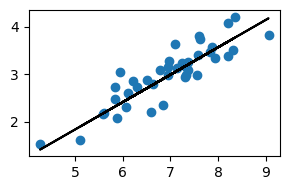

 R2 score is : 0.77 
 RMSE is : 0.08


In [54]:
plt.figure(figsize=(3,2))
plt.scatter(X_test,y_test,label='actual data')
plt.plot(X_test,y_pred,color='black',label='predicted line')
plt.tight_layout()
plt.show()
    
from sklearn.metrics import r2_score, mean_squared_error 
r2_s = r2_score(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)
print(f" R2 score is : {r2_s:.2f} \n RMSE is : {rmse:.2f}")

#### Apply L2 regularization / Ridge Regression

In [62]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=200)
R.fit(X_train,y_train)
y_pred1 = R.predict(X_test)
print(R.coef_,R.intercept_)

[0.27904762] [1.04104181]


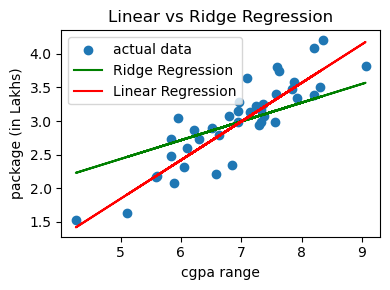

For Linear Regression:
 R2 score is : 0.77 
 RMSE is : 0.08
For Ridge Regression:
 R2 score is : 0.59 
 RMSE is : 0.15


In [65]:
plt.figure(figsize=(4,3))
plt.scatter(X_test,y_test,label='actual data')
plt.plot(X_test,y_pred1,color='green',label='Ridge Regression')
plt.plot(X_test,y_pred,color='red',label='Linear Regression')
plt.xlabel('cgpa range')
plt.ylabel('package (in Lakhs)')
plt.title('Linear vs Ridge Regression')
plt.legend()
plt.tight_layout()
plt.show()
    

R_r2_s = r2_score(y_test,y_pred1)
R_rmse = mean_squared_error(y_test,y_pred1)
print(f"For Linear Regression:\n R2 score is : {r2_s:.2f} \n RMSE is : {rmse:.2f}")
print(f"For Ridge Regression:\n R2 score is : {R_r2_s:.2f} \n RMSE is : {R_rmse:.2f}")

Insight: When our model is perfectly capturing the right amount of patter from data, rather than helping the model, it can reduce the accuracy.